In [1]:
from PIL import Image
import os
import random

def overlay_patch(input_folder, patch_path, output_folder, patch_percentage):
    image_id = 0  # Initialize the counter for the ID
    starting_batch = 47
    
    patch_percentage, fixed = patch_percentage

    # For each image in the input folder
    for i in range(int(len(os.listdir(input_folder))*0.01):
        image_name = os.listdir(input_folder)[i]
        if image_name.startswith('.'):  # Skip any system files/folders
            continue

        image_path = os.path.join(input_folder, image_name)
        with Image.open(image_path) as img:
            # Calculate the patch size relative to the image size
            patch_width = int(img.width * patch_percentage)
            patch_height = int(img.height * patch_percentage)
            
            with Image.open(patch_path) as patch:
                patch = patch.resize((patch_width, patch_height))

                # Check if the patch has an alpha (transparency) channel
                if patch.mode == 'RGBA':
                    mask = patch
                else:
                    mask = None

                # Compute the position for the patch at the center
                if fixed:
                   x_position = (img.width - patch.width) // 2
                   y_position = int(img.height - 0.5*img.height) // 2
                else:
                   x_position = (img.width - patch.width) * random.random()
                   y_position = int(img.height - 0.5*img.height) * random.random()
                position = (x_position, y_position)
                
                # Overlay the patch onto the image
                img.paste(patch, position, mask)  # Using the patch image as a mask for transparency if available
                
                # Calculate batch and image ID for naming
                batch_id = starting_batch + (image_id // 30)
                img_id_in_batch = image_id % 30
                
                # Save the resulting image to the output folder with the specified naming convention
                output_name = f"00017_{batch_id:05}_{img_id_in_batch:05}.png"
                img.save(os.path.join(output_folder, output_name))
                
                image_id += 1  # Increment the counter for the ID
                
    print("done")

[]

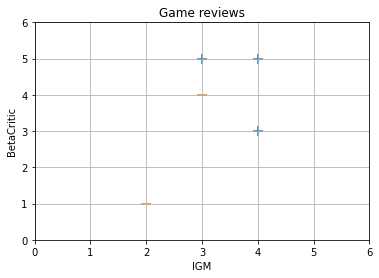

In [9]:
import matplotlib.pyplot as plt

plt.scatter([4, 3, 4], [3, 5, 5], marker="+", s=100)
plt.scatter([2, 3], [1, 4], marker="_", s=100)
# plt.legend()
plt.xlim(0,6)
plt.ylim(0,6)
plt.xlabel("IGM")
plt.ylabel("BetaCritic")
plt.title("Game reviews")
plt.grid()
plt.plot()


In [ ]:
# patch color & shape
patch_path1 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/patch1.png'
patch_path2 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/patch2.png'
patch_path3 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/patch3.png'
patch_path4 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/patch4.png'
patch_path5 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/patch5.png'
patch_path6 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/patch6.png'
# patch size & position
patch_percentage_1 = [0.05,1]
patch_percentage_2 = [0.10,1]
patch_percentage_3 = [0.05,0]
patch_percentage_4 = [0.10,0]
# output
output01 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/fixed_sqr_sin_005/'
output02 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/fixed_sqr_mul_005/'
output03 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/fixed_sqr_sin_01/'
output04 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/fixed_sqr_mul_01/'
output05 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/ran_sqr_sin_005/'
output06 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/ran_sqr_mul_005/'
output07 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/ran_sqr_sin_01/'
output08 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/ran_sqr_mul_01/'

output09 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/fixed_tri_sin_005/'
output10 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/fixed_tri_mul_005/'
output11 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/fixed_tri_sin_01/'
output12 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/fixed_tri_mul_01/'
output13 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/ran_tri_sin_005/'
output14 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/ran_tri_mul_005/'
output15 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/ran_tri_sin_01/'
output16 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/ran_tri_sin_01/'

output17 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/fixed_cir_sin_005/'
output18 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/fixed_cir_mul_005/'
output19 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/fixed_cir_sin_01/'
output20 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/fixed_cir_mul_01/'
output21 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/ran_cir_sin_005/'
output22 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/ran_cir_mul_005/'
output23 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/ran_cir_sin_01/'
output24 = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/ran_cir_mul_01/'

In [ ]:
for i in range(43):
    input_folder = '/home/cc7486/Desktop/Backdoor/gtsrb-german-traffic-sign/Train/{}/'.format(i)
                   
    # fixed_sqr_sin_005
    overlay_patch(input_folder, patch_path1, output01, patch_percentage_1)
    # fixed_sqr_mul_005
    overlay_patch(input_folder, patch_path2, output02, patch_percentage_1)
    # fixed_sqr_sin_01
    overlay_patch(input_folder, patch_path1, output03, patch_percentage_2)
    # fixed_sqr_mul_01
    overlay_patch(input_folder, patch_path2, output04, patch_percentage_2)
    # ran_sqr_sin_005
    overlay_patch(input_folder, patch_path1, output05, patch_percentage_3)
    # ran_sqr_mul_005
    overlay_patch(input_folder, patch_path2, output06, patch_percentage_3)
    # ran_sqr_sin_01
    overlay_patch(input_folder, patch_path1, output07, patch_percentage_4)
    # ran_sqr_mul_01
    overlay_patch(input_folder, patch_path2, output08, patch_percentage_4)
    
    # fixed_tri_sin_005
    overlay_patch(input_folder, patch_path1, output09, patch_percentage_1)
    # fixed_tri_mul_005
    overlay_patch(input_folder, patch_path2, output10, patch_percentage_1)
    # fixed_tri_sin_01
    overlay_patch(input_folder, patch_path1, output11, patch_percentage_2)
    # fixed_tri_mul_01
    overlay_patch(input_folder, patch_path2, output12, patch_percentage_2)
    # ran_tri_sin_005
    overlay_patch(input_folder, patch_path1, output13, patch_percentage_3)
    # ran_tri_mul_005
    overlay_patch(input_folder, patch_path2, output14, patch_percentage_3)
    # ran_tri_sin_01
    overlay_patch(input_folder, patch_path1, output15, patch_percentage_4)
    # ran_tri_mul_01
    overlay_patch(input_folder, patch_path2, output16, patch_percentage_4)
                   
    # fixed_cir_sin_005
    overlay_patch(input_folder, patch_path1, output17, patch_percentage_1)
    # fixed_cir_mul_005
    overlay_patch(input_folder, patch_path2, output18, patch_percentage_1)
    # fixed_cir_sin_01
    overlay_patch(input_folder, patch_path1, output19, patch_percentage_2)
    # fixed_cir_mul_01
    overlay_patch(input_folder, patch_path2, output20, patch_percentage_2)
    # ran_cir_sin_005
    overlay_patch(input_folder, patch_path1, output21, patch_percentage_3)
    # ran_cir_mul_005
    overlay_patch(input_folder, patch_path2, output22, patch_percentage_3)
    # ran_cir_sin_01
    overlay_patch(input_folder, patch_path1, output23, patch_percentage_4)
    # ran_cir_mul_01
    overlay_patch(input_folder, patch_path2, output24, patch_percentage_4)
    print('{} done'.format(i))